In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [15]:
housing = pd.read_csv("housing.csv")
housing.head(6)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


In [16]:
housing.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [17]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [19]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [20]:
## checking for missing values
missing_values = housing.isnull().sum()
missing_values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [21]:
### checking for categorical variables 
categorical = housing.select_dtypes(include = ["object"])
categorical.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [22]:
## checking for the continuous data 

continuous = housing.select_dtypes(include = ["float64", "int64"])
continuous.head(6)

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
5,10850000,7500,3,3,1,2


In [23]:
continuous.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Question 1
### Definition:
An outlier is a data point that stands out distinctly from the rest of the data in a dataset, potentially indicating errors in data collection, unusual events, or a unique subpopulation within the data. 
### Importance in data mining:
- Accuracy of analysis: Outliers can skew the results of statistical analysis and predictive modeling, leading to misleading conclusions if not identified and addressed appropriately. 
- Data quality check: Identifying outliers helps in detecting potential errors or inconsistencies in the data collection process. 
Insight generation: Sometimes, outliers can reveal valuable insights about rare events or hidden patterns within the data. 

# Question 2
## Types of outliers
### Global Outliers (Point Anomalies)
![Global](Global_Outliers.jpg)

 - These are single data points that significantly deviate from the rest of the dataset.
 -Example: A house priced at $10 million in a neighbourhood where most houses are
priced around $300,000.
### Contextual Outliers (Conditional Anomalies)
![Contextual](Contextual_Outliers.jpg)

- These depend on the context of the data.
- Example: A temperature of 30°C is normal in summer but would be an outlier in
winter.
### Collective Outliers
![Collective](Collective_Outliers.jpg)
- A group of data points that deviate together from the rest of the dataset.
-  Example: A sudden drop in website traffic over a specific time period due to a
technical issue.



# Qestion 3
## Methods for detecting outliers
1. Visual Methods
### Boxplot
- A boxplot displays the interquartile range (IQR), and data points outside 1.5 times the
IQR are considered potential outliers.
o Example: Points above the upper whisker or below the lower whisker in the
plot.
### Scatterplot
-  Useful for bivariate data. Outliers often appear as points that do not follow the
general trend.
### Histogram
- A histogram can reveal unusually high or low-frequency bins that indicate outliers.

2. Statistical Methods
### Z-Score (Standard Score)  
- Indicates how many standard deviations a data point is from the mean.  
- Formula: \( z = \frac{x - \mu}{\sigma} \)  
- A typical threshold for identifying outliers is when \( |z| > 3 \).

## IQR Method
- Outliers are values beyond:

### Checking for the outiers and data visualization

### Checking for data distribution

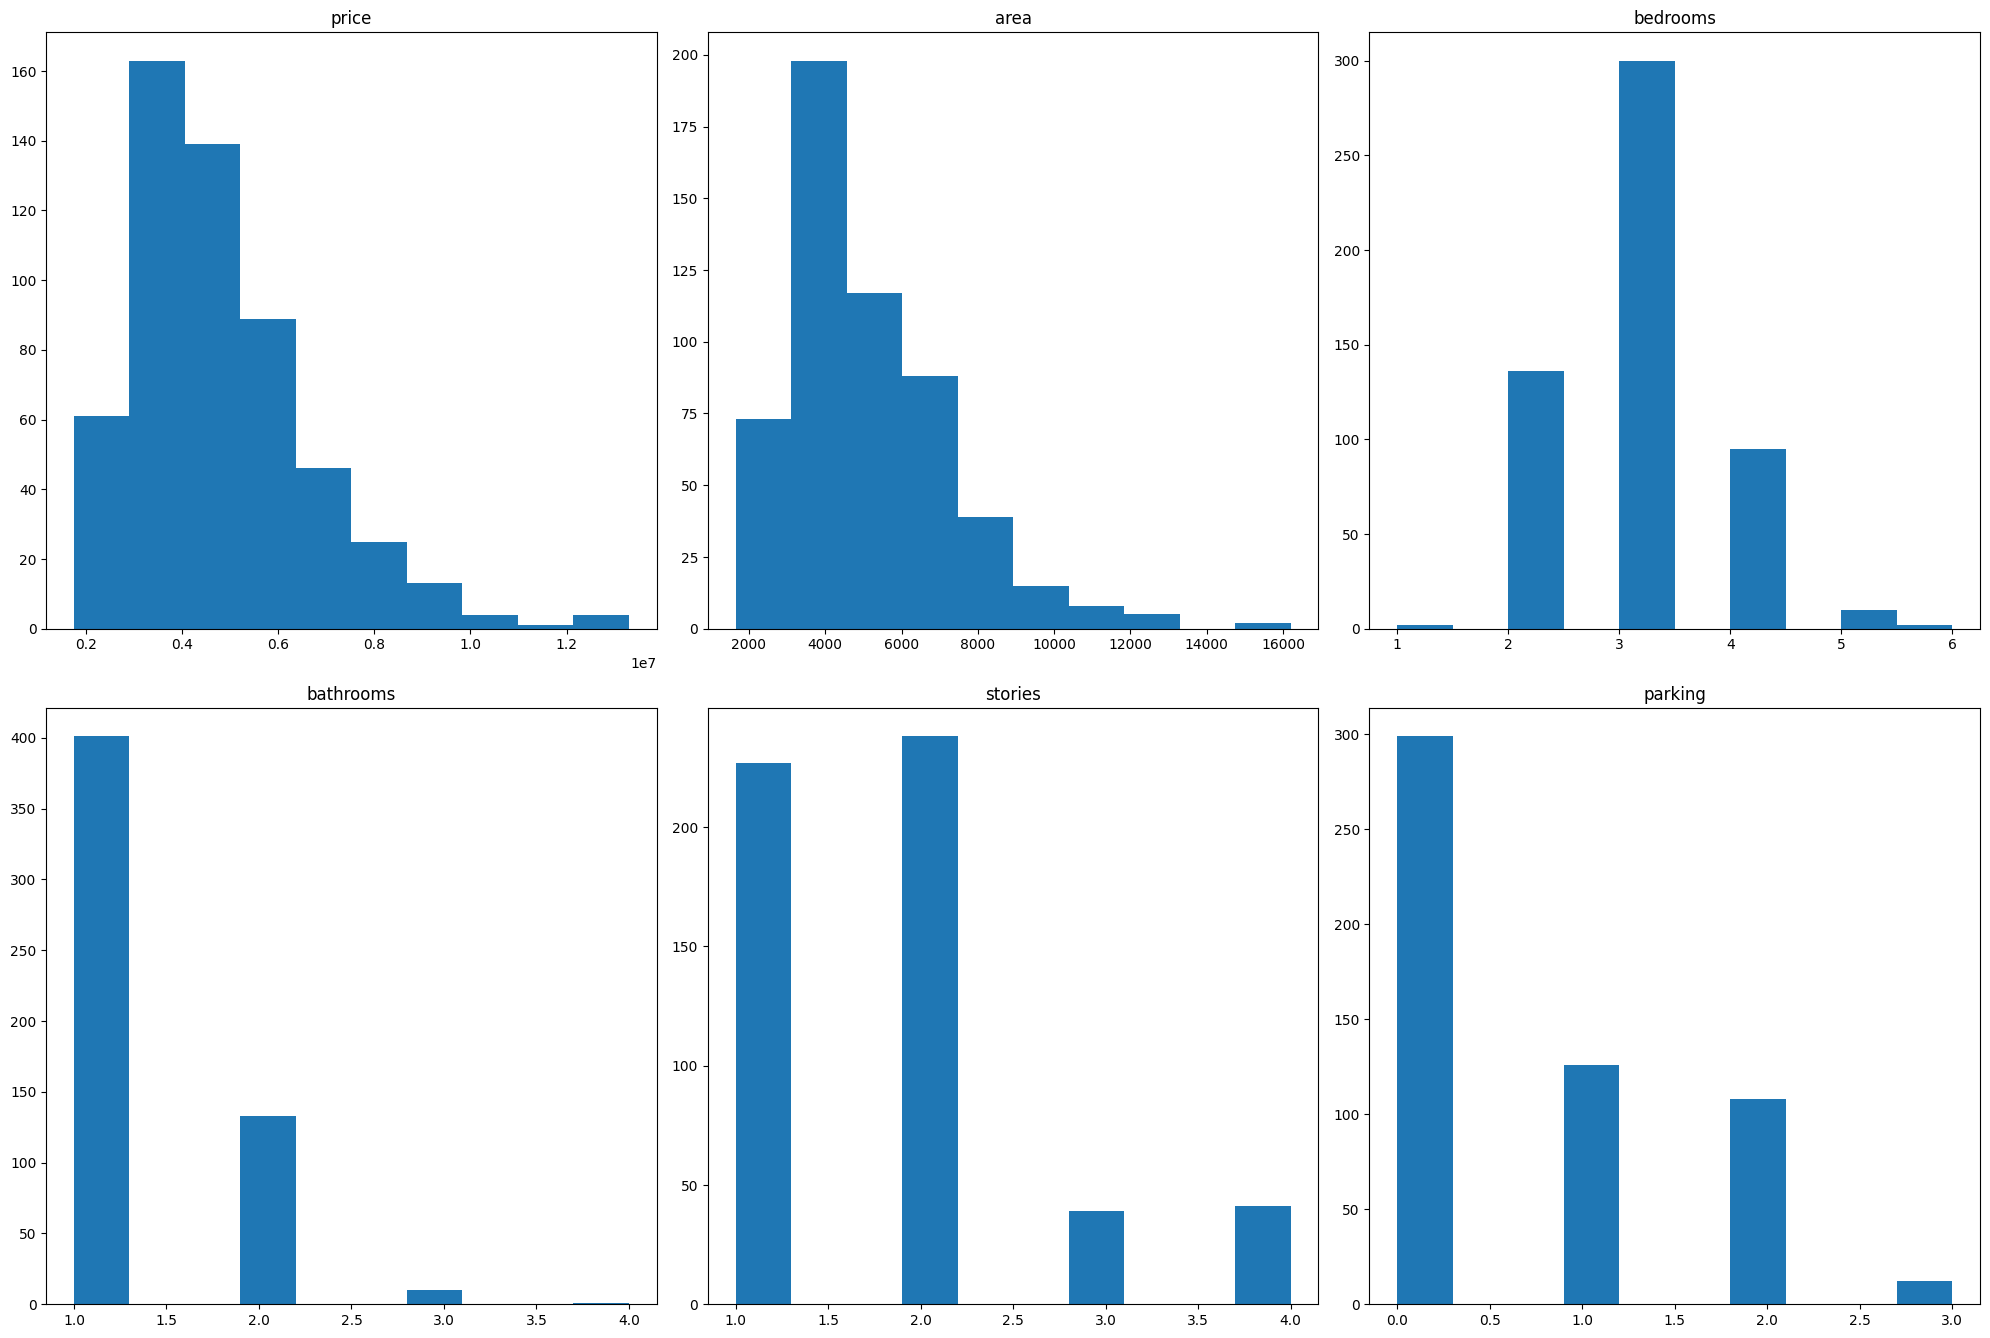

In [24]:
###checking for outliers using boxplot 
plt.figure(figsize=(20,20))
for i,col in enumerate(continuous.columns):
    plt.subplot(3,3, i+1)
    plt.hist(housing[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Observation
- Basing on the visuals, we  observe that all columns have outliers based on their distribution 

In [25]:
def box_plotting(continuous):
    plt.figure(figsize=(20,20))
    for i,col in enumerate(continuous.columns):
        plt.subplot(3,3, i+1)
        plt.boxplot(housing[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()



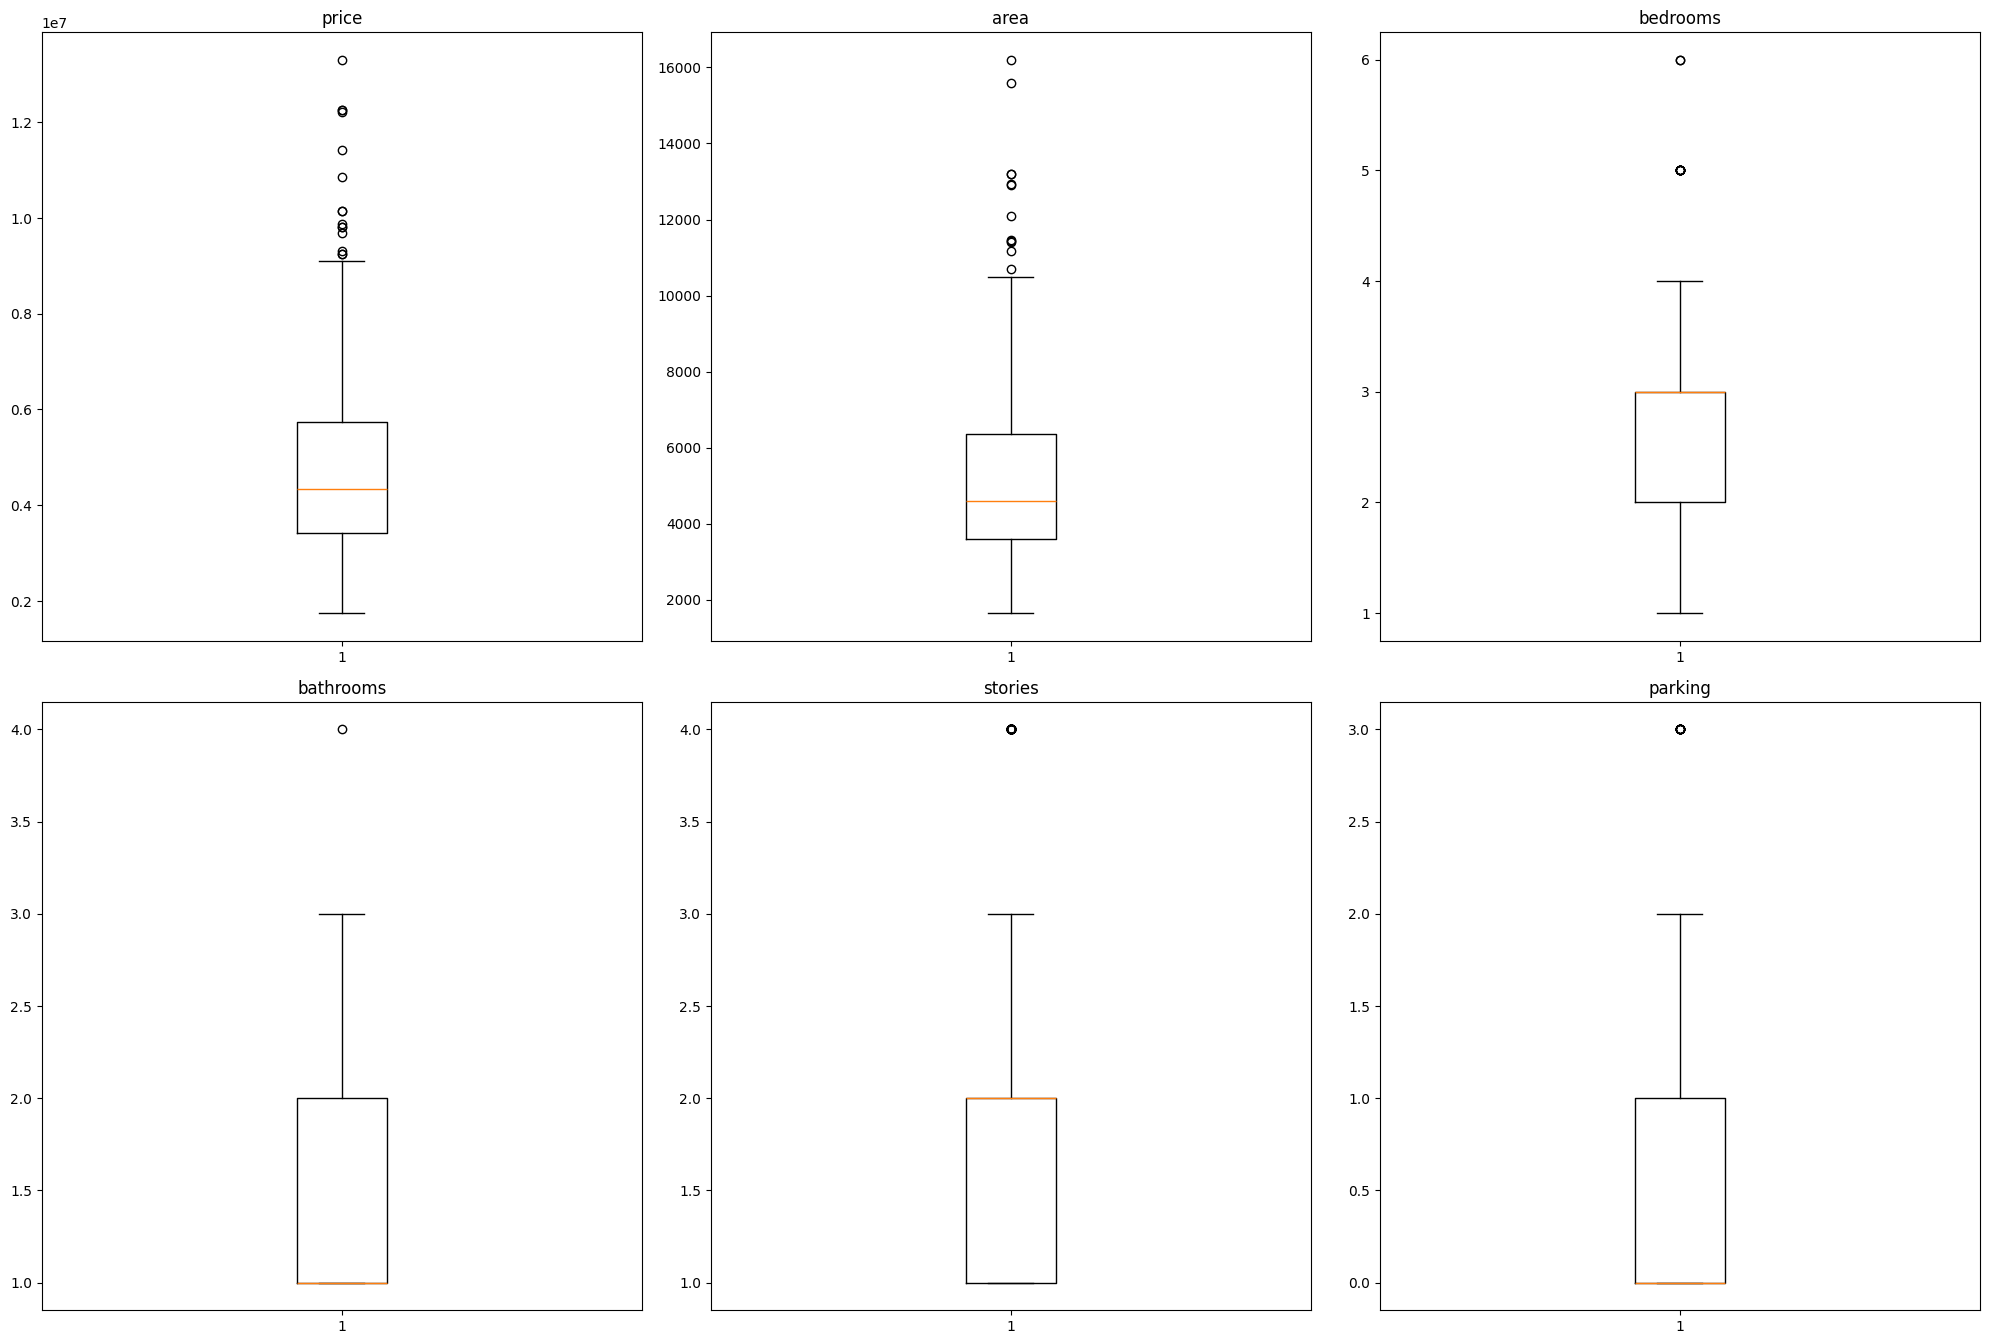

In [26]:
box_plotting(continuous)

### Observation
- Basing on the visuals, we can observe that all columns have outliers based on the boxplots

- This implies that we can use IQR to deal with the outliers 


In [27]:
### removing outlier using iqr
def outlier_remove(columns):
    for i in columns:
        
        lower_quantile = housing[i].quantile(.25)
        upper_quantile = housing[i].quantile(.75)
        
        
        IQR  = upper_quantile-lower_quantile
        
        upper_boundary = upper_quantile + 1.5 * IQR
        lower_boundary = lower_quantile - 1.5*IQR
        
        housing[i] = np.where(housing[i]>upper_boundary, upper_boundary, housing[i])
        housing[i] = np.where(housing[i]<lower_boundary, lower_boundary, housing[i])
    


In [28]:
outlier_remove(continuous.columns)

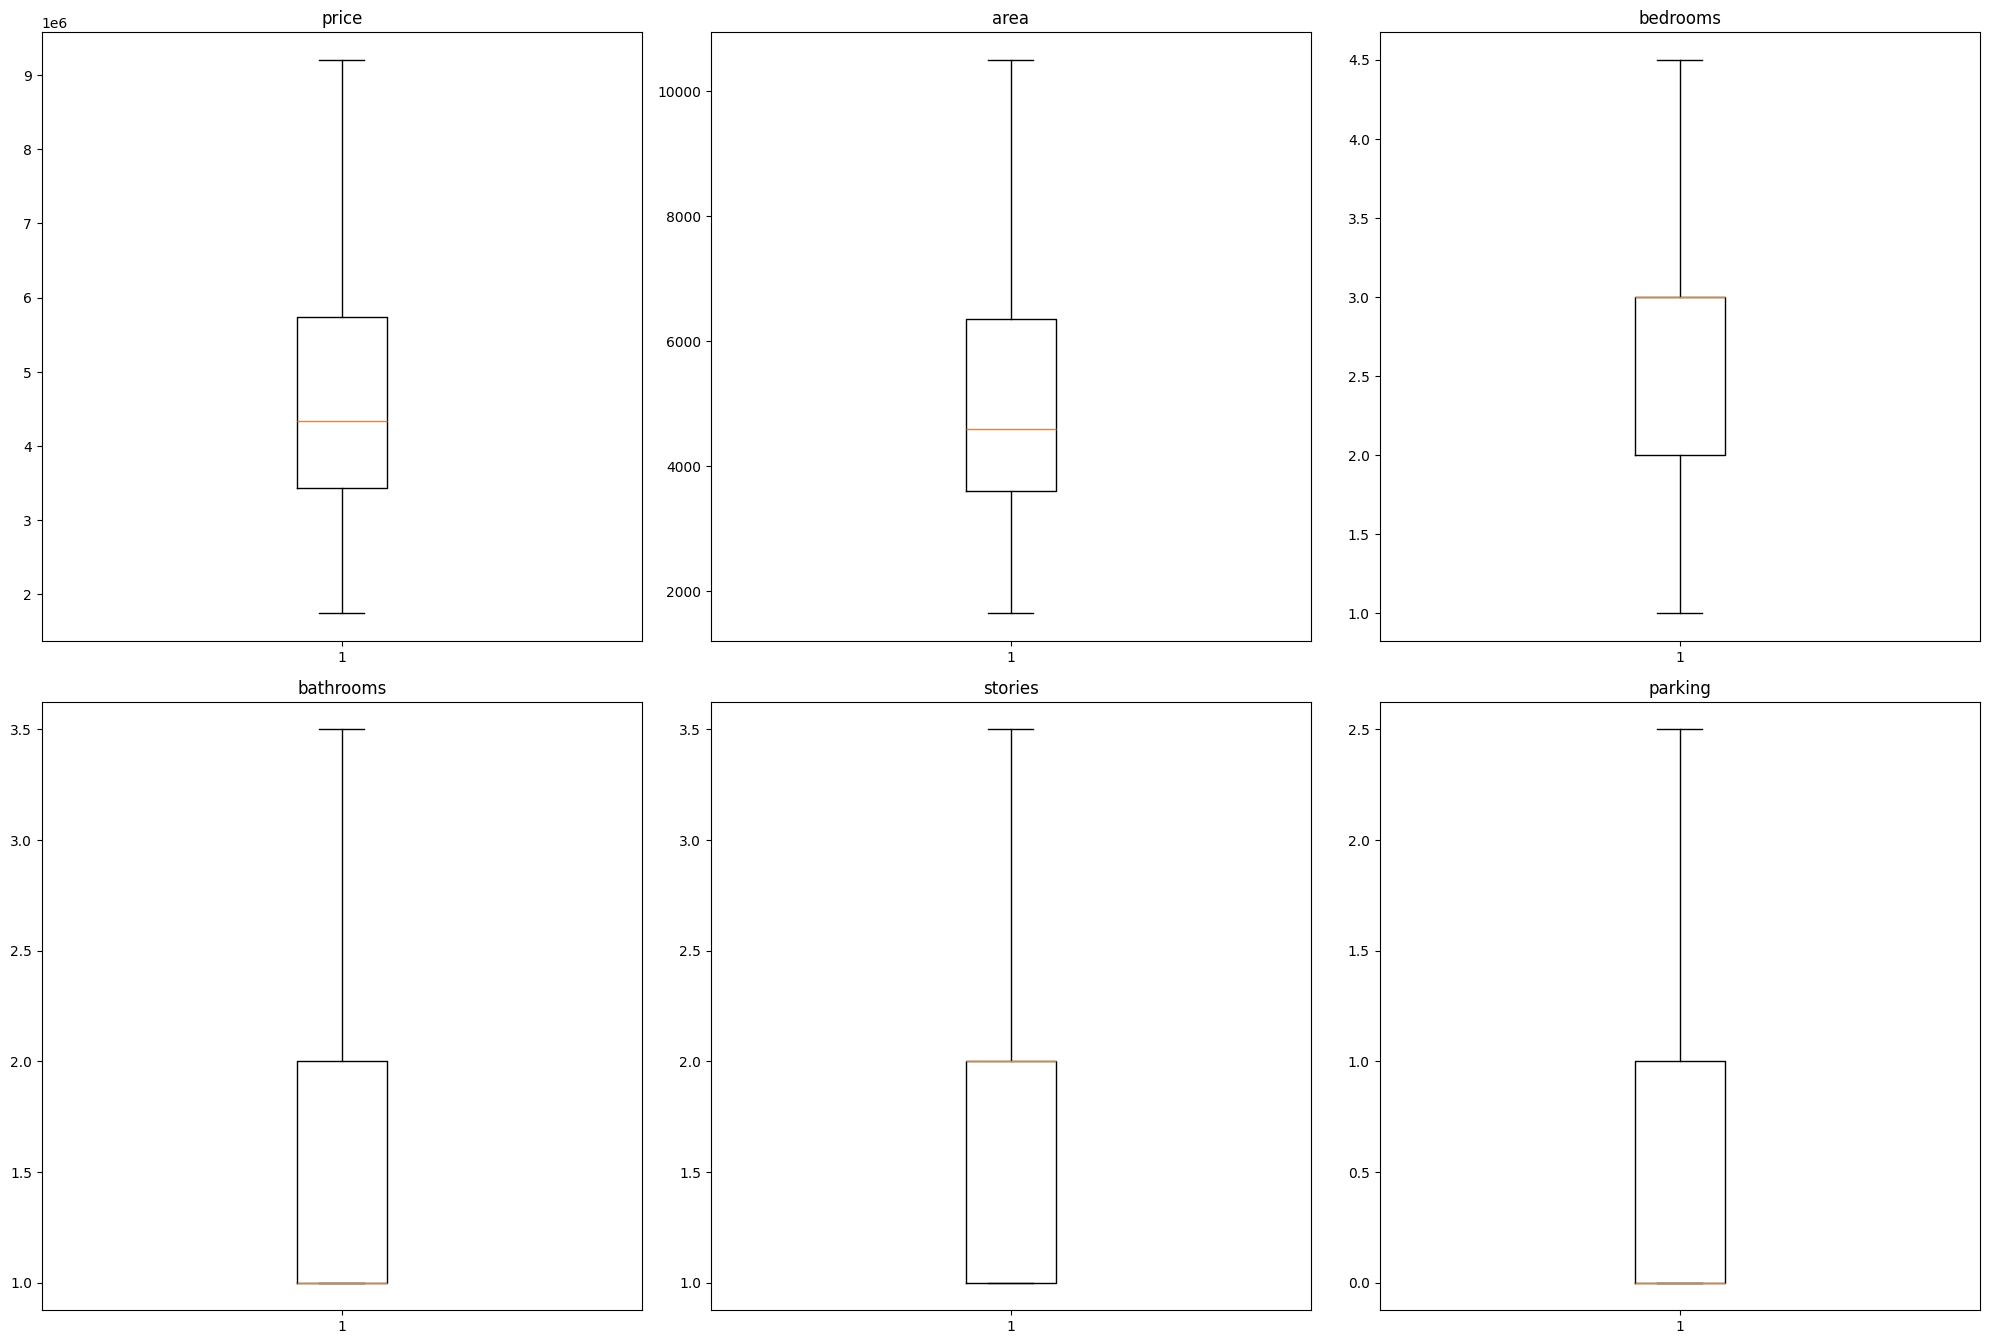

In [29]:
box_plotting(continuous)

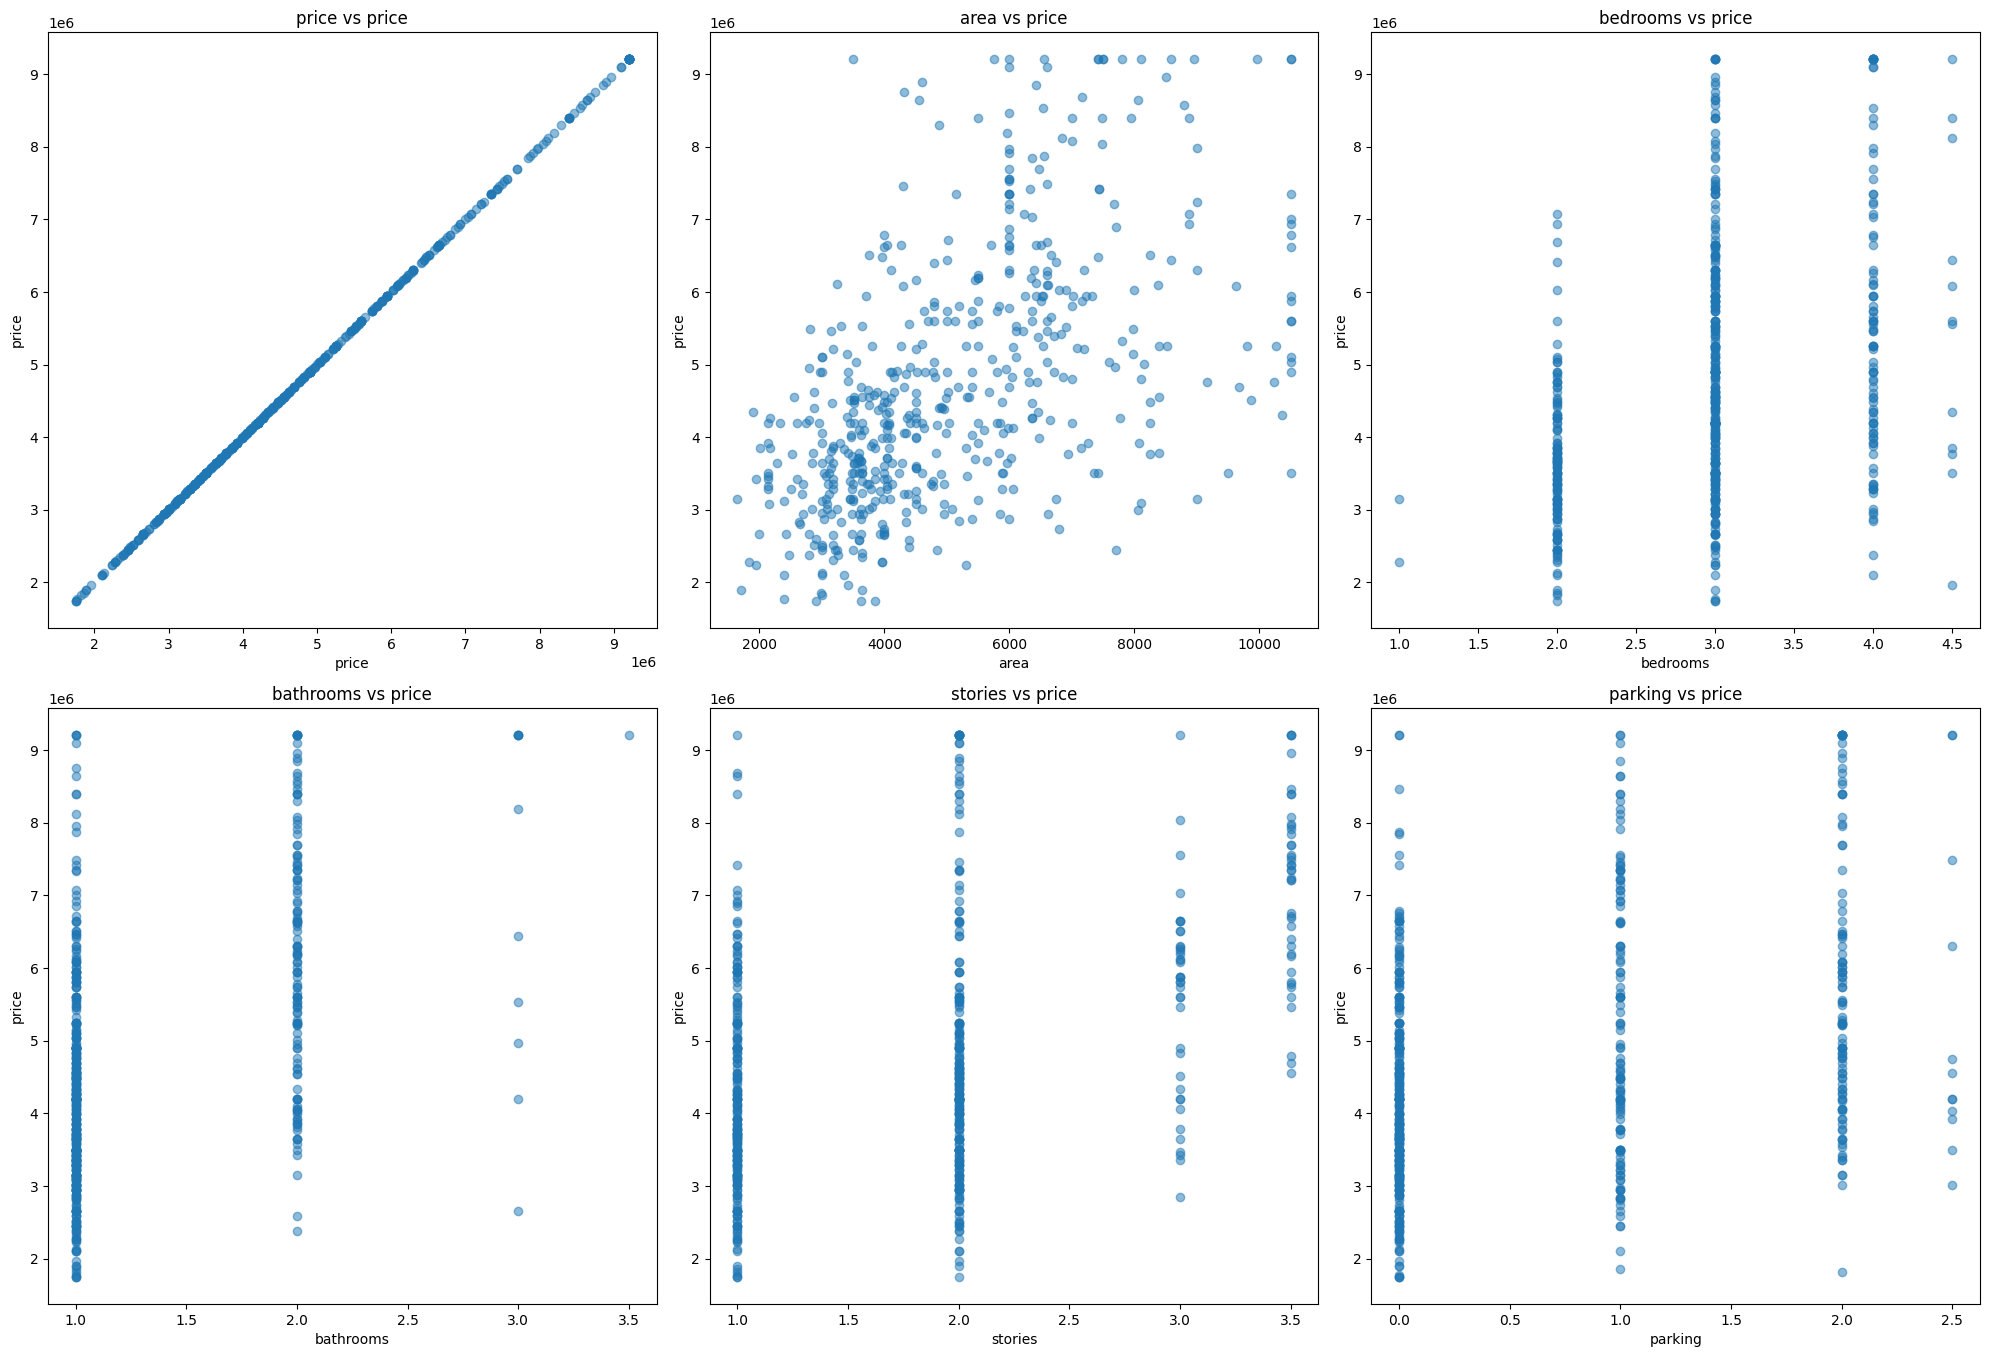

In [30]:

plt.figure(figsize=(20, 20))
target_column = "price"  # target variavle

for i, col in enumerate(continuous.columns):
    plt.subplot(3, 3, i + 1)
    plt.scatter(housing[col], housing[target_column], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel(target_column)
    plt.title(f"{col} vs {target_column}")

plt.tight_layout()
plt.show()


# Question 4 

## Impact of Outliers
Outliers are data points that significantly deviate from the overall pattern of a dataset. They can have a substantial impact on various statistical measures and machine learning models:

### 1. **Effect on Statistical Measures**
   - **Mean**: 
     - Outliers can skew the mean, making it unreliable as a measure of central tendency.
   - **Variance**:
     -  The presence of outliers increases the variance, which affects statistical modeling.
   - **Correlation**:
     - Outliers can distort correlation values, leading to misleading interpretations.

### 2. **Impact on Machine Learning Models**
   - **Linear Models**: 
     - Outliers can drastically influence regression coefficients, leading to poor generalization.
   - **Clustering**: 
     - Algorithms like K-Means can be misled by outliers, as they affect centroid calculations.
   - **Classification**: 
     - Outliers can lead to misclassification and affect decision boundary formation in models like SVM and decision trees.



## Strategies for Handling Outliers

### 1. **Detection Methods**
   - **Statistical Methods**: 
     - Z-score (Standard deviation method)
     - Interquartile Range (IQR)
   - **Visualization Techniques**:
     - Boxplots
     - Scatter plots
     - Histograms

### 2. **Handling Techniques**
   - **Removing Outliers**: 
     - If outliers result from data entry errors, they can be removed.
   - **Transformation**: 
     - Applying log transformation or normalization can reduce the impact of outliers.
   - **Robust Models**:
     - Using models like Robust Regression or Decision Trees, which are less sensitive to outliers.( `according to the class we had with madam`)

### 3. **Decision-Making Factors**
   - **Domain Knowledge**: 
     - Understanding whether an outlier is a valuable insight or an error.
   - **Data Distribution**: 
     - The method chosen depends on whether the data follows a normal distribution.
   - **Impact on Results**: 
     - If removing outliers significantly changes results, consider alternative approaches.

Carefully analyzing and handling outliers, we can improve the robustness and accuracy of their models while ensuring meaningful insights from data. This means that first understand the dataset before performing anything on it that is to say only remove outliers from columns with outliers that have invaluable insight or an error. 
